In [1]:
from sklearn.datasets import fetch_openml

mnist=fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
x,y=mnist["data"],mnist["target"]
y.shape

(70000,)

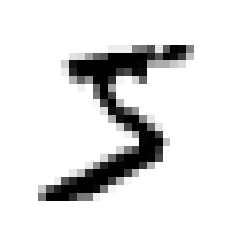

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit=x[0]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap='binary')
plt.axis('off')
plt.show()

In [4]:
y[0]

'5'

In [5]:
import numpy as np
y=y.astype(np.uint8)
y[0]

5

In [6]:
xtrain,xtest,ytrain,ytest=x[:60000],x[60000:],y[:60000],y[60000:]

In [7]:
ytrain5=(ytrain==5)
ytest5=(ytest==5)


In [8]:
from sklearn.linear_model import SGDClassifier

sgdclf=SGDClassifier(random_state=42)
sgdclf.fit(xtrain,ytrain5)

SGDClassifier(random_state=42)

In [9]:
sgdclf.predict([some_digit])

array([ True])

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgdclf,xtrain,ytrain5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [11]:
from sklearn.base import BaseEstimator

class never5classfier(BaseEstimator):
    def fit(self,x,y=None):
        return self
    def predict(self,x):
        return np.zeros((len(x),1),dtype=bool)


In [12]:
never5clf=never5classfier()
cross_val_score(never5clf,xtrain,ytrain5,cv=3,scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [13]:
from sklearn.model_selection import cross_val_predict

ytrainpred=cross_val_predict(sgdclf,xtrain,ytrain5,cv=3)

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytrain5,ytrainpred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [15]:
from sklearn.metrics import precision_score,recall_score

precision_score(ytrain5,ytrainpred)


0.8370879772350012

In [16]:
recall_score(ytrain5,ytrainpred)

0.6511713705958311

In [17]:
from sklearn.metrics import f1_score

f1_score(ytrain5,ytrainpred)

0.7325171197343846

In [18]:
yscores=sgdclf.decision_function([some_digit])
yscores

array([2164.22030239])

In [19]:
threshold=0
ysomedigitpred=(yscores>threshold)
ysomedigitpred

array([ True])

In [20]:
threshold=8000
ysomedigitpred=(yscores>threshold)
ysomedigitpred

array([False])

In [21]:
yscores=cross_val_predict(sgdclf,xtrain,ytrain5,cv=3,method='decision_function')

In [22]:
from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds=precision_recall_curve(ytrain5,yscores)

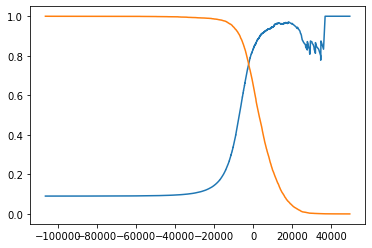

In [23]:
def plot_recall_threshold_graf(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],label='정밀도')
    plt.plot(thresholds,recalls[:-1],label='재현율')  
    [...]
plot_recall_threshold_graf(precisions,recalls,thresholds)
plt.show()

In [24]:
threshold90precision=thresholds[np.argmax(precisions>=0.90)]

In [25]:
ytrainpred90=(yscores>=threshold90precision)

precision_score(ytrain5,ytrainpred90)

0.9000345901072293

In [26]:
recall_score(ytrain5,ytrainpred90)

0.4799852425751706

In [27]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(ytrain5,yscores)


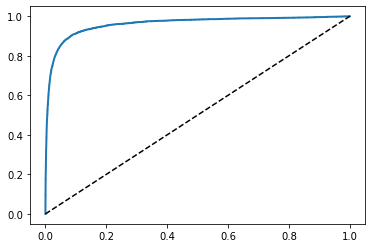

In [28]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)
plt.show()

In [29]:
from sklearn.metrics import roc_auc_score

roc_auc_score(ytrain5,yscores)

0.9604938554008616

In [30]:
from sklearn.ensemble import RandomForestClassifier

forestclf=RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forestclf,xtrain,ytrain5,cv=3,method='predict_proba')

In [31]:
yscoresforest=y_probas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest=roc_curve(ytrain5,yscoresforest)

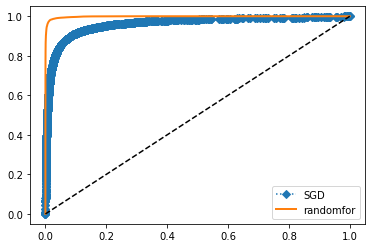

In [32]:
plt.plot(fpr,tpr,"D:",label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"randomfor")
plt.legend(loc="lower right")
plt.show()

In [33]:
roc_auc_score(ytrain5,yscoresforest)

0.9983436731328145

In [34]:
from sklearn.svm import SVC

svcclf=SVC()
svcclf.fit(xtrain,ytrain)
svcclf.predict([some_digit])


array([5], dtype=uint8)

In [35]:
some_digit_scores=svcclf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [36]:
np.argmax(some_digit_scores)

5

In [37]:
svcclf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [40]:
svcclf.classes_[5]

5

In [42]:
print('a')

a


In [43]:
from sklearn.multiclass import OneVsRestClassifier

ovrclf=OneVsRestClassifier(SVC())

ovrclf.fit(xtrain,ytrain)
ovrclf.predict([some_digit])

array([5], dtype=uint8)

In [44]:
len(ovrclf.estimators_)

10

In [45]:
sgdclf.fit(xtrain,ytrain)
sgdclf.predict([some_digit])

array([3], dtype=uint8)

In [46]:
sgdclf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [47]:
cross_val_score(sgdclf,xtrain,ytrain,cv=3,scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [49]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
Xtrain_scaled=scaler.fit_transform(xtrain.astype(np.float64))


In [50]:
cross_val_score(sgdclf,Xtrain_scaled,ytrain,cv=3,scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

In [51]:
ytrainpred=cross_val_predict(sgdclf,Xtrain_scaled,ytrain,cv=3)
conf_mx=confusion_matrix(ytrain,ytrainpred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

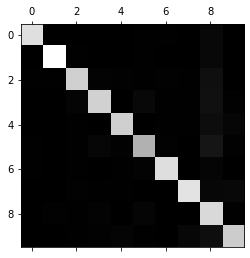

In [52]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

In [53]:
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sums


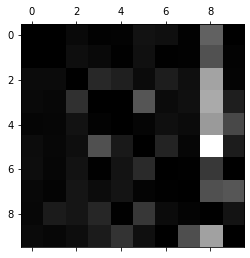

In [54]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

In [55]:
from sklearn.neighbors import KNeighborsClassifier

ytrainlarge=(ytrain>=7)
ytrainodd=(ytrain%2==1)
ymultimodel=np.c_[ytrainlarge,ytrainodd]

knn_clf=KNeighborsClassifier()
knn_clf.fit(xtrain,ymultimodel)

KNeighborsClassifier()

In [56]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [57]:
ytrainknn_pred=cross_val_predict(knn_clf,xtrain,ymultimodel,cv=3)
f1_score(ymultimodel,ytrainknn_pred,average='macro')

0.976410265560605

In [58]:
noise=np.random.randint(0,100,(len(xtrain),784))
xtrainmod=xtrain+noise
noise=np.random.randint(0,100,(len(xtest),784))
xtestmod=xtest+noise
ytrainmod=xtrain
ytestmod=xtest

In [60]:
knn_clf.fit(xtrainmod,ytrainmod)


KNeighborsClassifier()

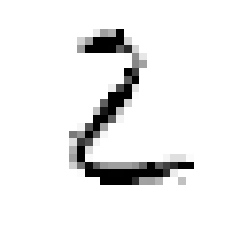

In [64]:
import matplotlib
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

cleandigit=knn_clf.predict([xtestmod[1]])
plot_digits(cleandigit)